In [45]:
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
import numpy as np

In [47]:
clients = pd.read_csv("CLIENTS.txt", delimiter=";")

C:\Users\zineb\AppData\Local\Temp\ipykernel_26036\339095001.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  clients = pd.read_csv("CLIENTS.txt", delimiter=";")


In [48]:
clients.head(-10)

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER
0,5468061,20000415.0,HAY SSMBA,20230608.0,PRIVE,MA,F??minin
1,5378995,19890309.0,MAARIF CASABLANCA,20230608.0,PRIVE,MA,F??minin
2,5453089,NaN,NaN,20230608.0,PRIVE,MA,Masculin
3,3312380,19630101.0,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Masculin
4,5456209,19930601.0,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,F??minin
...,...,...,...,...,...,...,...
6219316,1302337,19950813.0,RUE DE FES NR 51,20200713.0,PRIVE,MA,Masculin
6219317,1302553,19850320.0,TASSELTANT,20200713.0,NaN,MA,Masculin
6219318,6999412,19881009.0,XXXXXXX,20200711.0,NaN,FR,Masculin
6219319,5268843,19850606.0,AGHBALA,20200713.0,NaN,MA,F??minin


In [49]:
df_excluded = clients.drop(columns=['RADICAL_CLIENT'])
df_excluded.head(-10)

,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER
0,20000415.0,HAY SSMBA,20230608.0,PRIVE,MA,F??minin
1,19890309.0,MAARIF CASABLANCA,20230608.0,PRIVE,MA,F??minin
2,NaN,NaN,20230608.0,PRIVE,MA,Masculin
3,19630101.0,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Masculin
4,19930601.0,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,F??minin
...,...,...,...,...,...,...
6219316,19950813.0,RUE DE FES NR 51,20200713.0,PRIVE,MA,Masculin
6219317,19850320.0,TASSELTANT,20200713.0,NaN,MA,Masculin
6219318,19881009.0,XXXXXXX,20200711.0,NaN,FR,Masculin
6219319,19850606.0,AGHBALA,20200713.0,NaN,MA,F??minin


In [50]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219331 entries, 0 to 6219330
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   RADICAL_CLIENT  object 
 1   DATE_OF_BIRTH   float64
 2   ADDRESS         object 
 3   CUSTOMER_SINCE  float64
 4   EMPLOYERS_BUSS  object 
 5   COUNTRY         object 
 6   GENDER          object 
dtypes: float64(2), object(5)
memory usage: 332.1+ MB


In [51]:
clients['DATE_OF_BIRTH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6219331 entries, 0 to 6219330
Series name: DATE_OF_BIRTH
Non-Null Count    Dtype  
--------------    -----  
5940242 non-null  float64
dtypes: float64(1)
memory usage: 47.4 MB


In [52]:
# null values on date of birth
6219331 - 5940242

279089

In [53]:
median_dob = clients['DATE_OF_BIRTH'].median()
clients['DATE_OF_BIRTH'].fillna(median_dob, inplace=True)

In [54]:
clients['DATE_OF_BIRTH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6219331 entries, 0 to 6219330
Series name: DATE_OF_BIRTH
Non-Null Count    Dtype  
--------------    -----  
6219331 non-null  float64
dtypes: float64(1)
memory usage: 47.4 MB


In [55]:
# Convert to string and remove decimal for non-NaN values
clients['DATE_OF_BIRTH'] = clients['DATE_OF_BIRTH'].dropna().astype(int).astype(str)

# Convert the DATE_OF_BIRTH column to datetime for valid dates
clients['DATE_OF_BIRTH'] = pd.to_datetime(clients['DATE_OF_BIRTH'], format='%Y%m%d', errors='coerce')

In [56]:
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,F??minin
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,F??minin
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Masculin
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Masculin
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,F??minin


In [57]:
from datetime import datetime
def calculate_age(dob):
    today = datetime.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

clients['AGE'] = clients['DATE_OF_BIRTH'].apply(calculate_age)
clients['AGE'].head()

0    24.0
1    35.0
2    47.0
3    61.0
4    31.0
Name: AGE, dtype: float64

In [58]:
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,F??minin,24.0
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,F??minin,35.0
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Masculin,47.0
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Masculin,61.0
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,F??minin,31.0


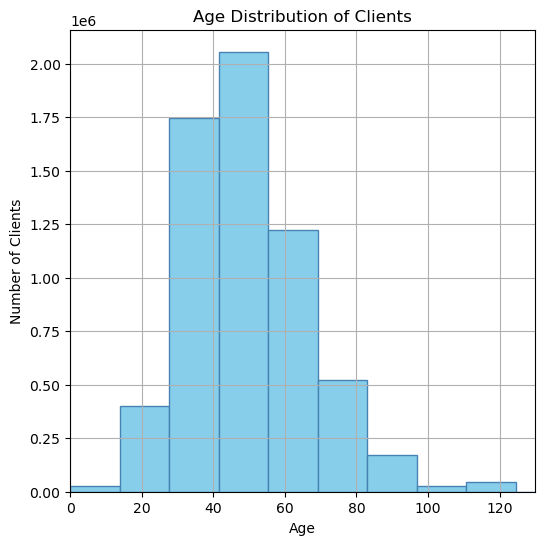

In [59]:
# Step 3: Visualize the age distribution
plt.figure(figsize=(6, 6))
plt.hist(clients['AGE'], bins=25, color='skyblue', edgecolor='steelblue')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.xlim(0, 130)
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

In [60]:
clients['GENDER'] = clients['GENDER'].str.replace('??','e')
clients['GENDER'].head()

0     Feminin
1     Feminin
2    Masculin
3    Masculin
4     Feminin
Name: GENDER, dtype: object

In [61]:
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,Feminin,24.0
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,Feminin,35.0
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Masculin,47.0
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Masculin,61.0
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,Feminin,31.0


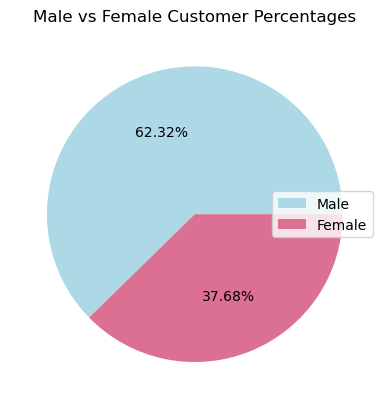

In [62]:
def autopct(pct): # only show the label when it's > 1%
    return ('%.2f%%' % pct) if pct > 1 else ''

colors = ['lightblue', 'palevioletred']

clients['GENDER'].value_counts().plot(kind='pie', autopct=autopct, ylabel='', labels=None, colors=colors)
plt.legend(loc=5, labels=('Male', 'Female'))
plt.title('Male vs Female Customer Percentages')
plt.show()

In [63]:
clients[clients['GENDER'] == 'u114544']

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE
2515316,3261814,1980-11-05,RUE 39 N 7,20111027.0,TRANS@GMAIL.COM,MA,u114544,43.0


In [64]:
clients['GENDER'].value_counts()

GENDER
Masculin    3714356
Feminin     2246055
u114544           1
Name: count, dtype: int64

In [65]:
clients['GENDER'] = clients['GENDER'].replace({
    'u114544': 'Masculin'})
clients['GENDER'].value_counts()

GENDER
Masculin    3714357
Feminin     2246055
Name: count, dtype: int64

In [66]:
clients['GENDER'] = clients['GENDER'].replace({
    'Masculin': 'Male',
    'Feminin': 'Female'
})
clients['GENDER'].value_counts()

GENDER
Male      3714357
Female    2246055
Name: count, dtype: int64

In [67]:
clients['COUNTRY'].value_counts()

COUNTRY
MA       5179161
FR        333360
XX        154005
ES        149370
IT         88171
          ...   
46000          1
YEM            1
124            1
80350          1
194            1
Name: count, Length: 704, dtype: int64

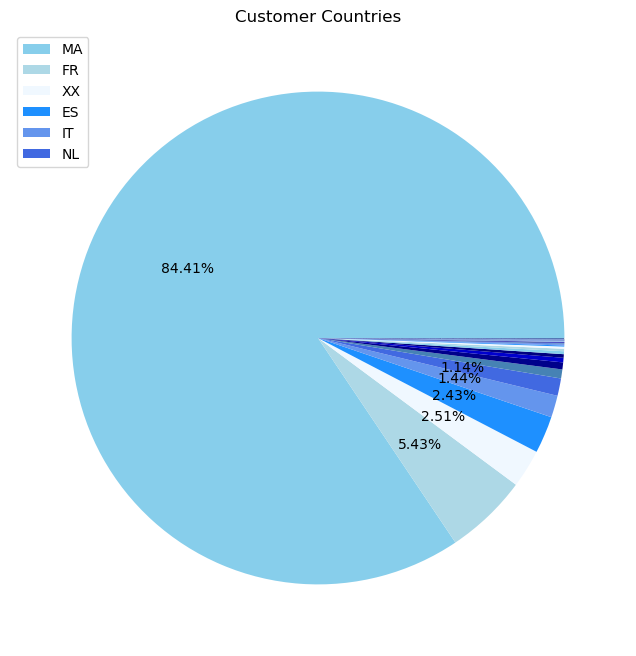

In [68]:
def autopct(pct): # only show the label when it's > 1%
    return ('%.2f%%' % pct) if pct > 1 else ''

my_labels = ('MA', 'FR', 'XX', 'ES', 'IT', 'NL')
colors = ['skyblue', 'lightblue', 'aliceblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'steelblue', 
          'darkblue','mediumblue', 'navy']

countries = clients['COUNTRY'].value_counts()
countries.plot(kind='pie', figsize=(8,8), autopct=autopct, labels=None, ylabel='', colors=colors)
plt.title('Customer Countries')
plt.legend(loc=2, labels=my_labels)

In [69]:
clients['CUST_SINCE_DATE'] = clients['CUSTOMER_SINCE'].astype(str).str.replace('\.0', '', regex=True)
clients['CUST_SINCE_DATE'] = pd.to_datetime(clients['CUST_SINCE_DATE'], format='%Y%m%d')
clients['CUST_SINCE_DATE'].head(10)

0   2023-06-08
1   2023-06-08
2   2023-06-08
3   2023-06-08
4   2023-06-08
5   2023-06-08
6   2023-06-08
7   2023-06-08
8   2023-06-08
9   2023-06-08
Name: CUST_SINCE_DATE, dtype: datetime64[ns]

In [70]:
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE,CUST_SINCE_DATE
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,Female,24.0,2023-06-08
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,Female,35.0,2023-06-08
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Male,47.0,2023-06-08
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Male,61.0,2023-06-08
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,Female,31.0,2023-06-08


In [71]:
from datetime import datetime
current_date = pd.to_datetime(datetime.now().date())
clients['Tenure'] = (current_date - clients['CUST_SINCE_DATE']).dt.days

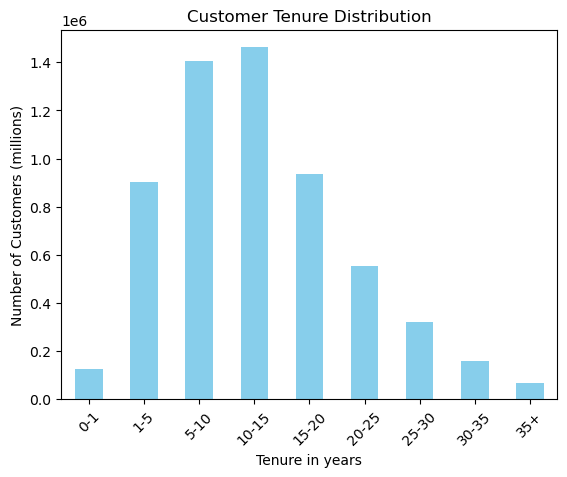

In [72]:
# Define bins and labels
bins = [0, 365, 1825, 3650, 5475, 7300, 9125, 10950, 12775, 14000]
labels = ['0-1', '1-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35+']

# Group the tenures into bins
clients['TenureGroup'] = pd.cut(clients['Tenure'], bins=bins, labels=labels)

# Count the number of customers in each tenure group
tenure_counts = clients['TenureGroup'].value_counts().sort_index()

# Plot the data
tenure_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Tenure in years')
plt.ylabel('Number of Customers (millions)')
plt.title('Customer Tenure Distribution')
plt.xticks(rotation=45)
plt.show()

In [73]:
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE,CUST_SINCE_DATE,Tenure,TenureGroup
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,Female,24.0,2023-06-08,468.0,1-5
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,Female,35.0,2023-06-08,468.0,1-5
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Male,47.0,2023-06-08,468.0,1-5
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Male,61.0,2023-06-08,468.0,1-5
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,Female,31.0,2023-06-08,468.0,1-5


In [74]:
import seaborn as sns

C:\Users\zineb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


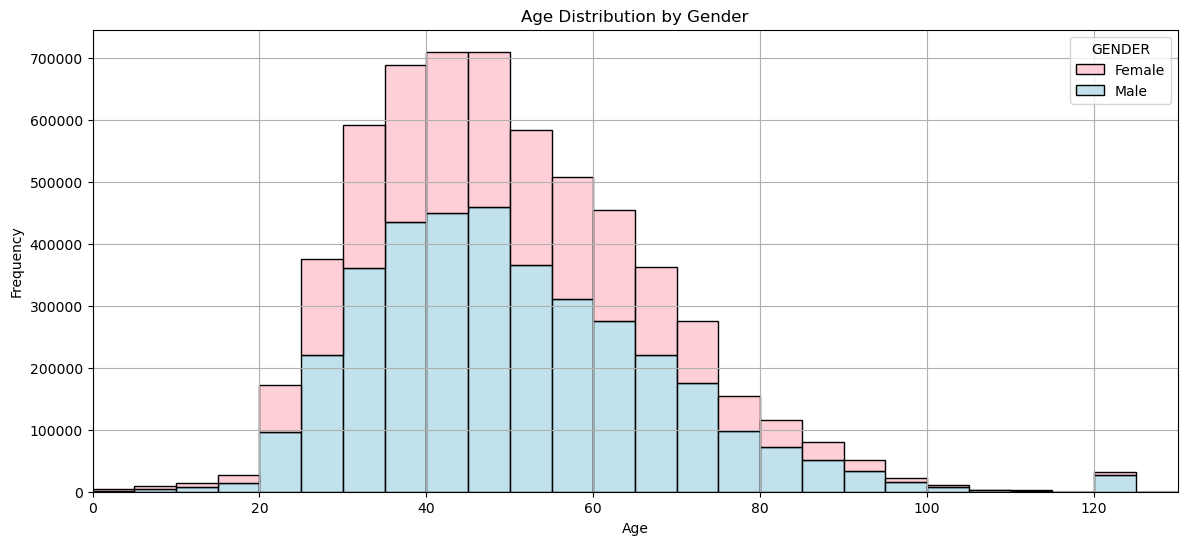

In [75]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Histogram for Age Distribution by Gender
#plt.subplot(1, 2, 1)
sns.histplot(data=clients, x='AGE', hue='GENDER', multiple='stack', palette={'Male': 'lightblue', 'Female': 'pink'}, bins=range(int(clients['AGE'].min()), int(clients['AGE'].max()) + 1, 5))
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.xlim(0, 130)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

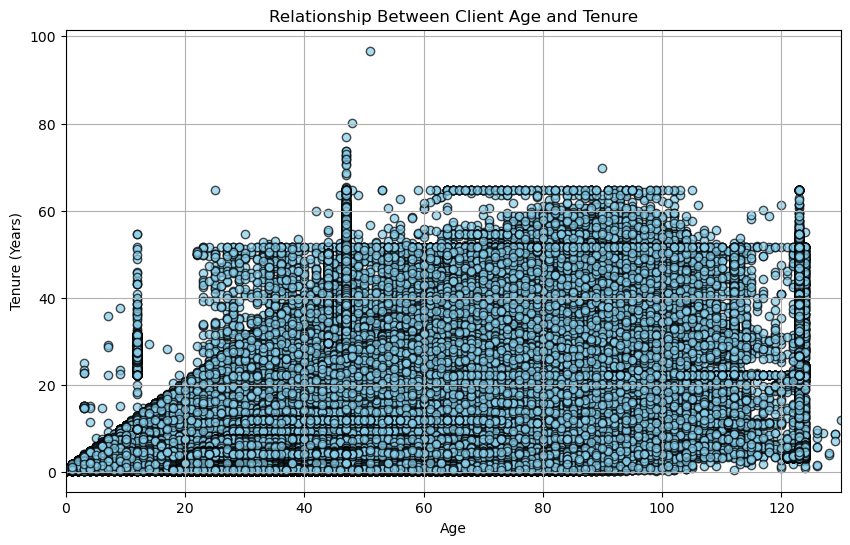

In [76]:
# Convert TENURE from days to years
clients['TENURE_YEARS'] = clients['Tenure'] / 365.25

# Plot the relationship between Age and Tenure (in years)
plt.figure(figsize=(10, 6))
plt.scatter(clients['AGE'], clients['TENURE_YEARS'], alpha=0.7, color='skyblue', edgecolor='black')

# Customize the scatter plot
plt.title('Relationship Between Client Age and Tenure')
plt.xlabel('Age')
plt.xlim(0, 130)
plt.ylabel('Tenure (Years)')
plt.grid(True)

# Show the plot
plt.show()

C:\Users\zineb\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


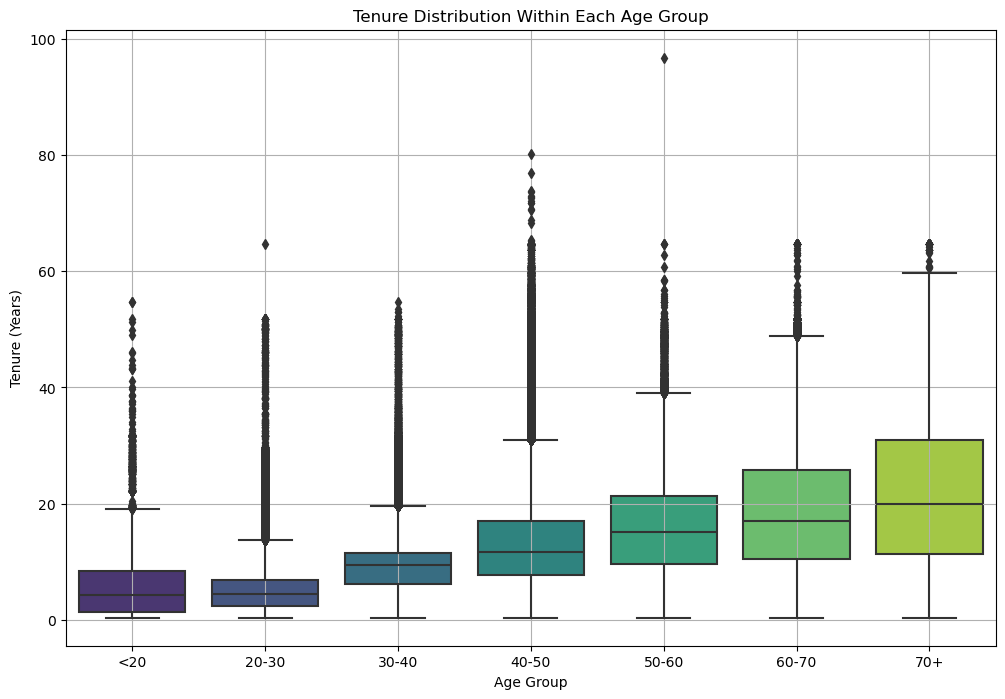

In [77]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80]  # Define age groups
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']  # Labels for age groups
clients['AGE_GROUP'] = pd.cut(clients['AGE'], bins=bins, labels=labels, right=False)

# Plot tenure distribution within each age group using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=clients, x='AGE_GROUP', y='TENURE_YEARS', palette='viridis')
plt.title('Tenure Distribution Within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Tenure (Years)')
plt.grid(True)

# Show the plot
plt.show()


C:\Users\zineb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


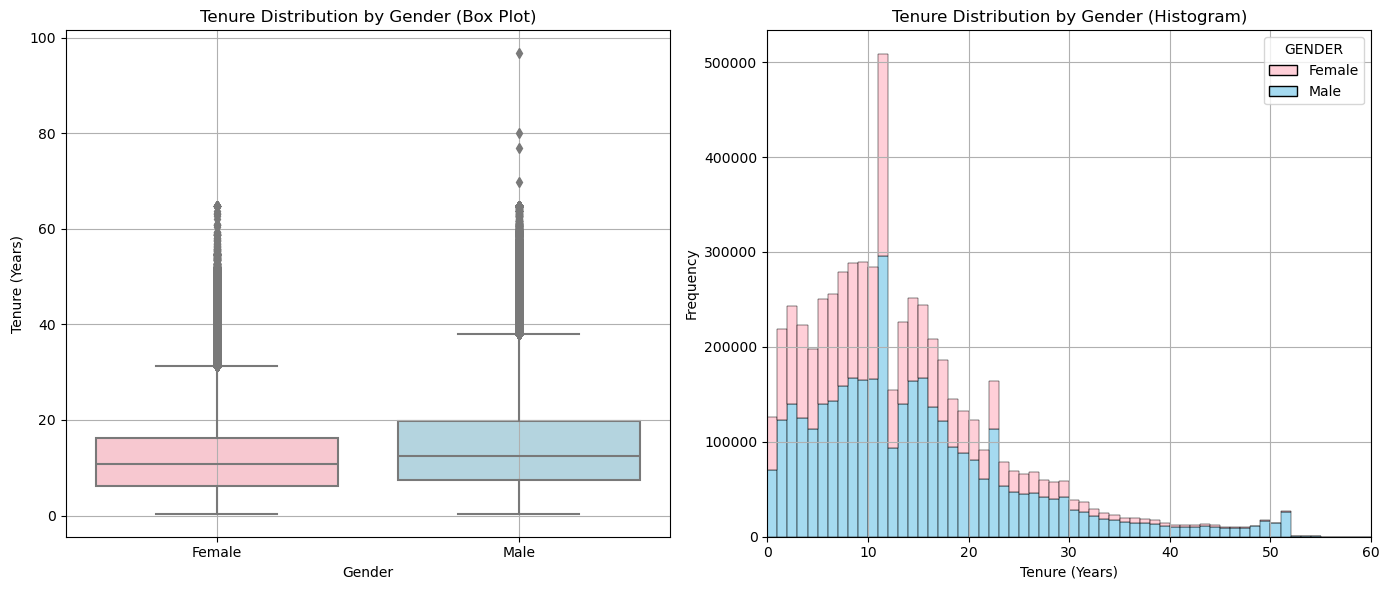

In [78]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Box Plot for Tenure Distribution by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=clients, x='GENDER', y='TENURE_YEARS', palette={'Male': 'lightblue', 'Female': 'pink'})
plt.title('Tenure Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.grid(True)

# Histogram for Tenure Distribution by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=clients, x='TENURE_YEARS', hue='GENDER', multiple='stack', palette={'Male': 'skyblue', 'Female': 'pink'}, bins=range(0, int(clients['TENURE_YEARS'].max()) + 1, 1))
plt.title('Tenure Distribution by Gender (Histogram)')
plt.xlabel('Tenure (Years)')
plt.xlim(0,60)
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [79]:
# Step 2: Extract year from CUST_SINCE_DATE
clients['Year'] = clients['CUST_SINCE_DATE'].dt.year

# Step 3: Count the number of clients acquired each year
client_acquisition = clients['Year'].value_counts().sort_index()

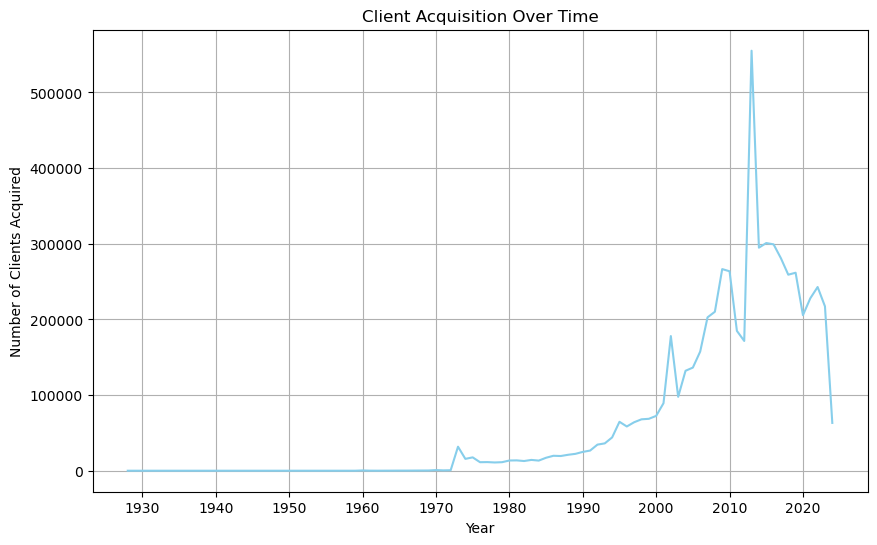

In [80]:
# Step 4: Plot the data using a line graph
plt.figure(figsize=(10, 6))
plt.plot(client_acquisition.index, client_acquisition.values, linestyle='-', color='skyblue')

# Customize the chart
plt.title('Client Acquisition Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Clients Acquired')
plt.xticks(ticks=range(1930, 2024, 10))
plt.grid(True)
# Show the plot
plt.show()

In [81]:
clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        692743
1                            333089
2                            325897
PUBLIC                       148288
\PRIVE                        27001
                              ...  
CORMAN                            1
LA COMMUNE                        1
BAT EL HOUAT II & TAGANTE         1
RESPONSABLE AGENCE PRIVEE         1
FACULTE DE MEDCINE                1
Name: count, Length: 3056, dtype: int64

In [82]:
# Mapping the values in EMPLOYERS_BUSS
# Transforming '1' and '\PRIVE' into 'PRIVE', and '2' into 'PUBLIC'

clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    '1': 'PRIVE',
    '\PRIVE': 'PRIVE',
    '2': 'PUBLIC'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                 1052833
PUBLIC                 474185
PRIVE\PRIVE             14107
\\PRIVE                  4819
\\\PRIVE                 4685
                       ...   
REASSURANCE                 1
GERANTE EBTREPRISE          1
ETABLISS BILADI             1
---                         1
FACULTE DE MEDCINE          1
Name: count, Length: 3053, dtype: int64

In [83]:
clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    'PRIVE\PRIVE': 'PRIVE',
    '\\PRIVE': 'PRIVE',
    '\\\PRIVE': 'PRIVE'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        1071759
PUBLIC                        474185
\\\PRIVE                        4685
PUBLIC\PUBLIC                   2602
PRIVE\PRIVE\PRIVE\PRIVE         1837
                              ...   
CORMAN                             1
LA COMMUNE                         1
BAT EL HOUAT II & TAGANTE          1
RESPONSABLE AGENCE PRIVEE          1
FACULTE DE MEDCINE                 1
Name: count, Length: 3051, dtype: int64

In [84]:
clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    'PRIVE\PRIVE\PRIVE\PRIVE': 'PRIVE',
    '\\\PRIVE': 'PRIVE',
    'PUBLIC\PUBLIC': 'PUBLIC'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        1073596
PUBLIC                        476787
\\\PRIVE                        4685
PRIVE\PRIVE\PRIVE               1645
\PUBLIC                          761
                              ...   
CORMAN                             1
LA COMMUNE                         1
BAT EL HOUAT II & TAGANTE          1
RESPONSABLE AGENCE PRIVEE          1
FACULTE DE MEDCINE                 1
Name: count, Length: 3049, dtype: int64

In [85]:
clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    '\PRIVE\PRIVE\PRIVE': 'PRIVE',
    '\PUBLIC': 'PUBLIC'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        1073596
PUBLIC                        477548
\\\PRIVE                        4685
PRIVE\PRIVE\PRIVE               1645
1\1                              417
                              ...   
CORMAN                             1
LA COMMUNE                         1
BAT EL HOUAT II & TAGANTE          1
RESPONSABLE AGENCE PRIVEE          1
FACULTE DE MEDCINE                 1
Name: count, Length: 3048, dtype: int64

In [86]:
clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    'PRIVE\PRIVE\PRIVE': 'PRIVE',
    '\\\PRIVE': 'PRIVE',
    "1\1": 'PRIVE'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        1075241
PUBLIC                        477548
\\\PRIVE                        4685
1\1                              417
PUBLIC\PUBLIC\PUBLIC             402
                              ...   
CORMAN                             1
LA COMMUNE                         1
BAT EL HOUAT II & TAGANTE          1
RESPONSABLE AGENCE PRIVEE          1
FACULTE DE MEDCINE                 1
Name: count, Length: 3047, dtype: int64

In [87]:
clients['EMPLOYERS_BUSS'] = clients['EMPLOYERS_BUSS'].replace({
    'PUBLIC\PUBLIC\PUBLIC': 'PUBLIC',
    '\\\PRIVE': 'PRIVE',
    "1\1": 'PRIVE'
})

clients['EMPLOYERS_BUSS'].value_counts()

EMPLOYERS_BUSS
PRIVE                        1075241
PUBLIC                        477950
\\\PRIVE                        4685
1\1                              417
2\2                              359
                              ...   
CORMAN                             1
LA COMMUNE                         1
BAT EL HOUAT II & TAGANTE          1
RESPONSABLE AGENCE PRIVEE          1
FACULTE DE MEDCINE                 1
Name: count, Length: 3046, dtype: int64

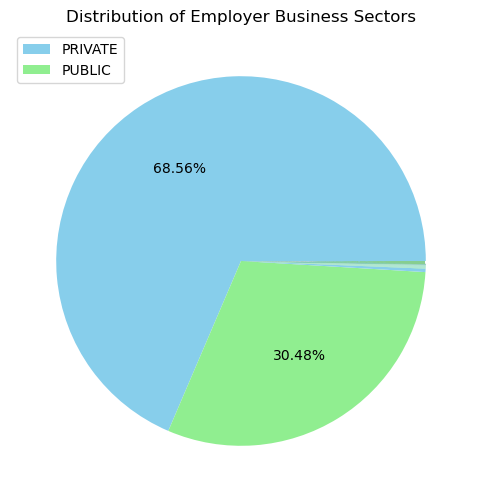

In [88]:
def autopct(pct): # only show the label when it's > 1%
    return ('%.2f%%' % pct) if pct > 1 else ''

employers_buss_counts = clients['EMPLOYERS_BUSS'].value_counts()
colors = ['skyblue','lightgreen']
plt.figure(figsize=(10, 6))
employers_buss_counts.plot(kind='pie', autopct=autopct, ylabel='', labels=None, colors=colors)

my_labels = ('PRIVATE', 'PUBLIC')

plt.title('Distribution of Employer Business Sectors')
plt.legend(loc=2, labels=my_labels)
plt.show()

In [89]:
cptfer = pd.read_csv("CPTFER.txt", delimiter=";")

In [90]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00


In [91]:
cptfer['DATE_CLOSED'] = pd.to_datetime(cptfer['DATE_DEMANDE'], dayfirst=True)
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00,2008-01-18
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00,2011-06-24
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00,2016-04-27
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00,2017-02-08
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00,2008-10-13


In [94]:
cptfer['YEAR'] = cptfer['DATE_CLOSED'].dt.year

In [95]:
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED,Year,YEAR
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00,2008-01-18,2008.0,2008.0
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00,2011-06-24,2011.0,2011.0
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00,2016-04-27,2016.0,2016.0
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00,2017-02-08,2017.0,2017.0
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00,2008-10-13,2008.0,2008.0


In [96]:
median_year = cptfer['YEAR'].median()
cptfer['YEAR'] = cptfer['YEAR'].fillna(median_year)
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED,Year,YEAR
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00,2008-01-18,2008.0,2008.0
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00,2011-06-24,2011.0,2011.0
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00,2016-04-27,2016.0,2016.0
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00,2017-02-08,2017.0,2017.0
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00,2008-10-13,2008.0,2008.0


In [97]:
cptfer = cptfer.drop('Year', axis=1)
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED,YEAR
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00,2008-01-18,2008.0
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00,2011-06-24,2011.0
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00,2016-04-27,2016.0
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00,2017-02-08,2017.0
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00,2008-10-13,2008.0


In [98]:
cptfer['MONTH'] = cptfer['DATE_CLOSED'].dt.month
cptfer.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED,YEAR,MONTH
0,64,24,21211,9216056,18/1/2008 00:00:00,20/4/2024 00:00:00,2008-01-18,2008.0,1.0
1,1,26,21111,9216094,24/6/2011 00:00:00,20/4/2024 00:00:00,2011-06-24,2011.0,6.0
2,78,25,21111,9216117,27/4/2016 00:00:00,20/4/2024 00:00:00,2016-04-27,2016.0,4.0
3,78,66,21211,9216229,8/2/2017 00:00:00,20/4/2024 00:00:00,2017-02-08,2017.0,2.0
4,81,5,21111,9216395,13/10/2008 00:00:00,20/4/2024 00:00:00,2008-10-13,2008.0,10.0


In [99]:
clients['RADICAL'] = clients['RADICAL_CLIENT']
clients.head()

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE,CUST_SINCE_DATE,Tenure,TenureGroup,TENURE_YEARS,AGE_GROUP,Year,RADICAL
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,Female,24.0,2023-06-08,468.0,1-5,1.281314,20-30,2023.0,5468061
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,Female,35.0,2023-06-08,468.0,1-5,1.281314,30-40,2023.0,5378995
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Male,47.0,2023-06-08,468.0,1-5,1.281314,40-50,2023.0,5453089
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Male,61.0,2023-06-08,468.0,1-5,1.281314,60-70,2023.0,3312380
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,Female,31.0,2023-06-08,468.0,1-5,1.281314,30-40,2023.0,5456209


In [100]:
# Merge accounts_closed with clients data on 'RADICAL'
merged_df = pd.merge(cptfer, clients, on='RADICAL', how='inner')

# Count the number of closed accounts by gender
gender_closure_counts = merged_df['GENDER'].value_counts()

In [101]:
merged_df['YEAR'].head()

0    2017.0
1    2010.0
2    2010.0
3    2015.0
4    2011.0
Name: YEAR, dtype: float64

In [102]:
merged_df = merged_df.astype({"YEAR": 'int'})
merged_df['YEAR'].head()

0    2017
1    2010
2    2010
3    2015
4    2011
Name: YEAR, dtype: int32

In [103]:
median_year = merged_df['MONTH'].median()
merged_df['MONTH'] = merged_df['MONTH'].fillna(median_year)

In [104]:
merged_df = merged_df.astype({"MONTH": 'int'})
merged_df['MONTH'].head()

0     2
1     5
2    12
3     1
4     1
Name: MONTH, dtype: int32

In [105]:
gender_yearly_closures = merged_df.groupby(['YEAR', 'GENDER']).size().unstack()

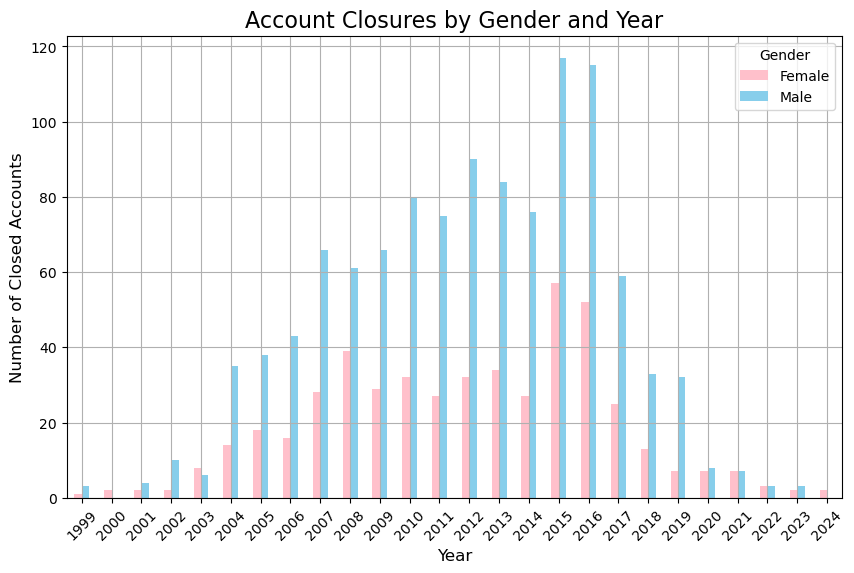

In [106]:
# Plot the bar chart
gender_yearly_closures.plot(kind='bar', figsize=(10, 6), color=['pink', 'skyblue'])

plt.title('Account Closures by Gender and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Closed Accounts', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(True)
#plt.tight_layout()
plt.show()

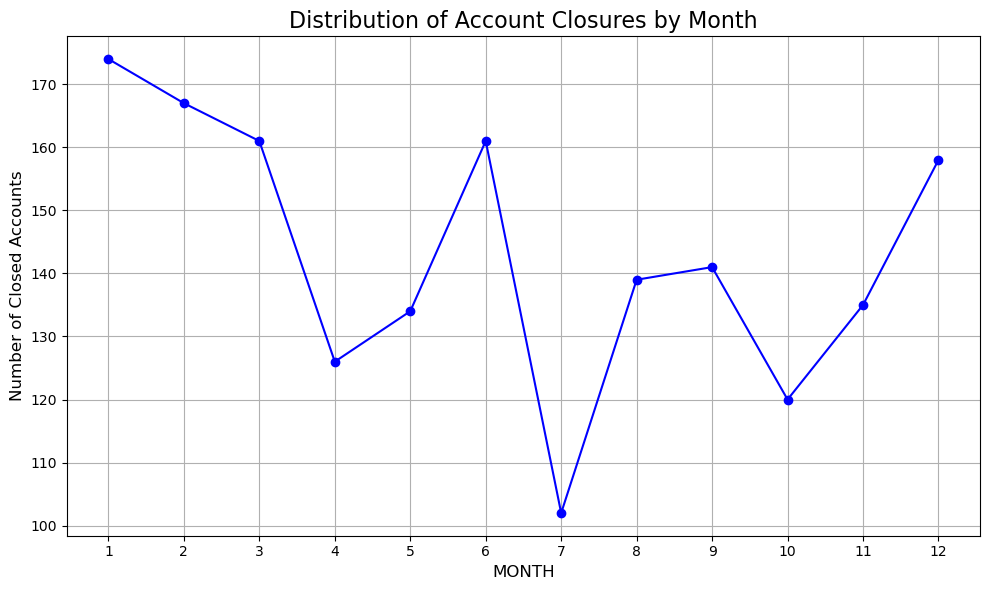

In [107]:
# plot distribution by monthly closures
closures_by_month = merged_df.groupby('MONTH').size()


plt.figure(figsize=(10, 6))
closures_by_month.plot(kind='line', marker='o', color='blue')

plt.title('Distribution of Account Closures by Month', fontsize=16)
plt.xlabel('MONTH', fontsize=12)
plt.ylabel('Number of Closed Accounts', fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(1, 13, 1))
plt.tight_layout()
plt.show()

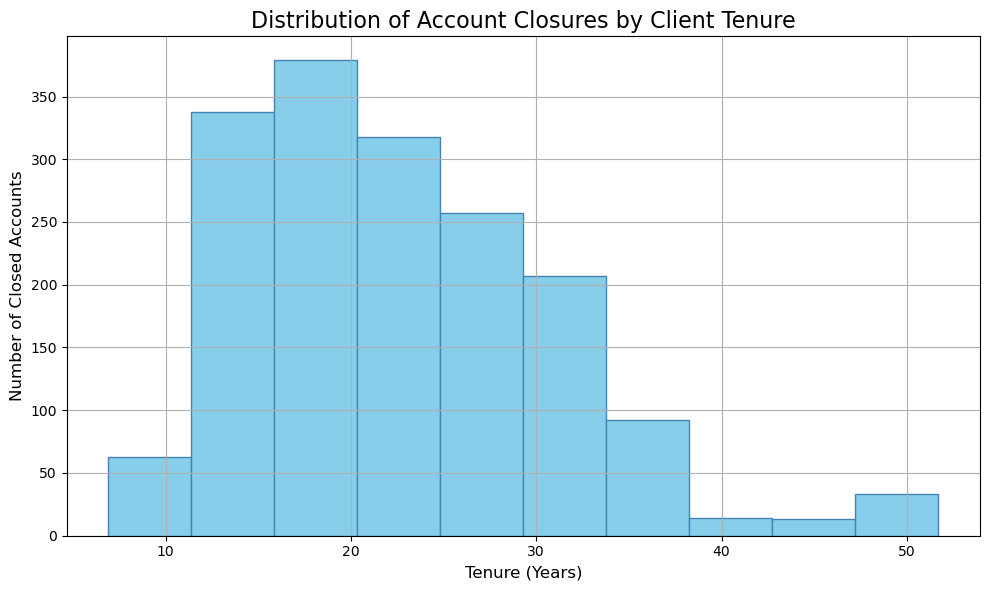

In [108]:
# plot distribution by tenure
plt.figure(figsize=(10, 6))
plt.hist(merged_df['TENURE_YEARS'], bins=10, color='skyblue', edgecolor='steelblue')

plt.title('Distribution of Account Closures by Client Tenure', fontsize=16)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Number of Closed Accounts', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
merged_df['AGE'] = merged_df['YEAR'] - merged_df['DATE_OF_BIRTH'].dt.year

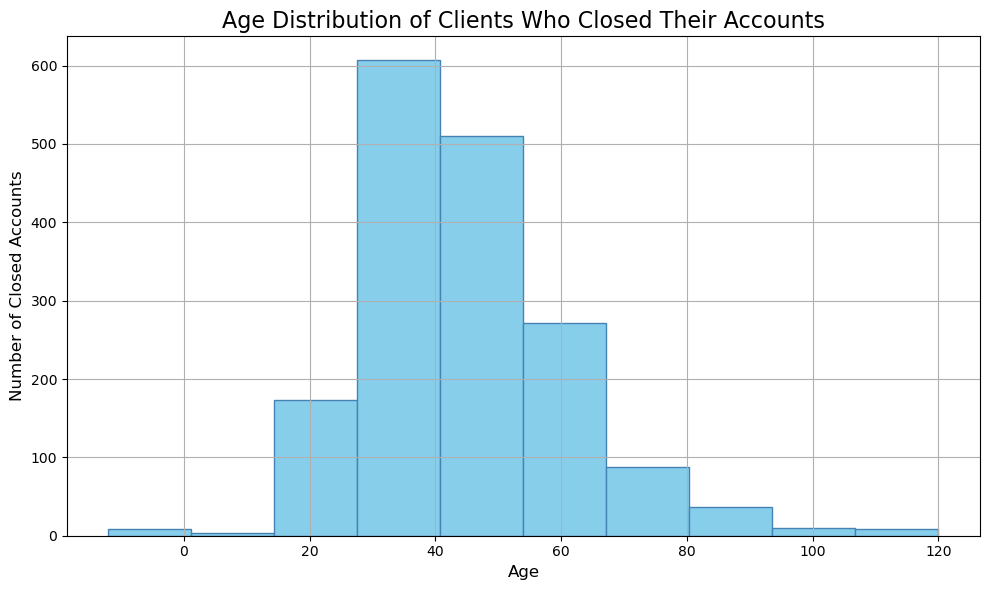

In [110]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_df['AGE'], bins=10, color='skyblue', edgecolor='steelblue')

plt.title('Age Distribution of Clients Who Closed Their Accounts', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Closed Accounts', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

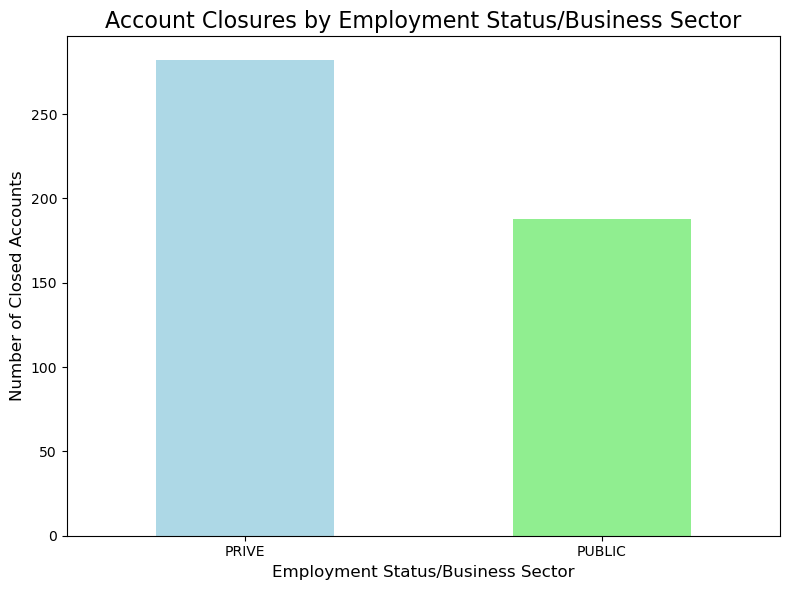

In [111]:
filtered_df = merged_df[merged_df['EMPLOYERS_BUSS'].isin(['PRIVE', 'PUBLIC'])]

closures_by_sector = filtered_df.groupby('EMPLOYERS_BUSS')['RADICAL'].count()

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
closures_by_sector.plot(kind='bar', color=['lightblue', 'lightgreen'])

# Add labels and title
plt.title('Account Closures by Employment Status/Business Sector', fontsize=16)
plt.xlabel('Employment Status/Business Sector', fontsize=12)
plt.ylabel('Number of Closed Accounts', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [113]:
# Filter data for the year 2023
closed_2023 = merged_df[merged_df['YEAR'] == 2023]

closed_2023.head()

,BANQUE,AGENCE,GENERIQUE,RADICAL,DATE_DEMANDE,DATE_TRAITEMENT,DATE_CLOSED,YEAR,MONTH,RADICAL_CLIENT,...,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE,CUST_SINCE_DATE,Tenure,TenureGroup,TENURE_YEARS,AGE_GROUP,Year
181,78,62,21111,7159579,7/6/2023 00:00:00,20/4/2024 00:00:00,2023-06-07,2023,6,7159579,...,NaN,FR,Female,58.0,2003-04-16,7826.0,20-25,21.426420,50-60,2003.0
293,1,39,21111,5494624,15/9/2023 00:00:00,20/4/2024 00:00:00,2023-09-15,2023,9,5494624,...,PRIVE,ES,Male,39.0,2012-04-16,4538.0,10-15,12.424367,30-40,2012.0
440,79,14,21111,4034850,27/12/2023 00:00:00,20/4/2024 00:00:00,2023-12-27,2023,12,4034850,...,PUBLIC,MA,Male,70.0,2013-04-19,4170.0,10-15,11.416838,70+,2013.0
476,82,42,21330,3721749,9/5/2023 00:00:00,20/4/2024 00:00:00,2023-05-09,2023,5,3721749,...,NaN,MA,Female,59.0,1986-08-26,13903.0,35+,38.064339,50-60,1986.0
570,78,33,21140,3257604,18/1/2023 00:00:00,20/4/2024 00:00:00,2023-01-18,2023,1,3257604,...,PUBLIC,MA,Male,39.0,2011-10-25,4712.0,10-15,12.900753,30-40,2011.0


In [115]:
# Number of closed accounts in 2023
closed_accounts_2023 = closed_2023['RADICAL'].count()
closed_accounts_2023

5

In [116]:
# Get the total number of active accounts at the start of 2023
start_of_2023 = clients[~clients['RADICAL'].isin(closed_2023['RADICAL'])]
start_of_2023

,RADICAL_CLIENT,DATE_OF_BIRTH,ADDRESS,CUSTOMER_SINCE,EMPLOYERS_BUSS,COUNTRY,GENDER,AGE,CUST_SINCE_DATE,Tenure,TenureGroup,TENURE_YEARS,AGE_GROUP,Year,RADICAL
0,5468061,2000-04-15,HAY SSMBA,20230608.0,PRIVE,MA,Female,24.0,2023-06-08,468.0,1-5,1.281314,20-30,2023.0,5468061
1,5378995,1989-03-09,MAARIF CASABLANCA,20230608.0,PRIVE,MA,Female,35.0,2023-06-08,468.0,1-5,1.281314,30-40,2023.0,5378995
2,5453089,1977-01-01,NaN,20230608.0,PRIVE,MA,Male,47.0,2023-06-08,468.0,1-5,1.281314,40-50,2023.0,5453089
3,3312380,1963-01-01,LOT FATH ETG 2 N 68,20230608.0,PRIVE,MA,Male,61.0,2023-06-08,468.0,1-5,1.281314,60-70,2023.0,3312380
4,5456209,1993-06-01,ACHENAD ZAIDI TANGER,20230608.0,PRIVE,MA,Female,31.0,2023-06-08,468.0,1-5,1.281314,30-40,2023.0,5456209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219326,1293012,2002-02-25,05 DRB 02 NR 19,20200714.0,NaN,MA,Male,22.0,2020-07-14,1527.0,1-5,4.180698,20-30,2020.0,1293012
6219327,1302714,1991-03-22,TAZA,20200714.0,NaN,MA,Female,33.0,2020-07-14,1527.0,1-5,4.180698,30-40,2020.0,1302714
6219328,1303082,1969-03-04,N 201,20200714.0,NaN,MA,Female,55.0,2020-07-14,1527.0,1-5,4.180698,50-60,2020.0,1303082
6219329,1323493,2000-01-05,IMILCHIL,20200714.0,NaN,MA,Male,24.0,2020-07-14,1527.0,1-5,4.180698,20-30,2020.0,1323493


In [118]:
# Filter for accounts that were active before the start of 2023
active_accounts_start_2023 = start_of_2023[start_of_2023['CUST_SINCE_DATE'].dt.year < 2023]['RADICAL'].count()
active_accounts_start_2023

5860870

In [120]:
# Calculate attrition rate
if active_accounts_start_2023 > 0:
    attrition_rate = (closed_accounts_2023 / active_accounts_start_2023) * 100
else:
    attrition_rate = 0  # To handle the case where there are no active accounts

print(f'Attrition Rate for the year 2023: {attrition_rate:.5f}%')

Attrition Rate for the year 2023: 0.00009%


In [121]:
# Filter data for the year 2021
closed_2021 = merged_df[merged_df['YEAR'] == 2021]

# Number of closed accounts in 2023
closed_accounts_2021 = closed_2021['RADICAL'].count()

# Get the total number of active accounts at the start of 2023
start_of_2021 = clients[~clients['RADICAL'].isin(closed_2021['RADICAL'])]

# Filter for accounts that were active before the start of 2023
active_accounts_start_2021 = start_of_2021[start_of_2021['CUST_SINCE_DATE'].dt.year < 2021]['RADICAL'].count()

In [122]:
# Calculate attrition rate
if active_accounts_start_2021 > 0:
    attrition_rate = (closed_accounts_2021 / active_accounts_start_2021) * 100
else:
    attrition_rate = 0  # To handle the case where there are no active accounts

print(f'Attrition Rate for the year 2021: {attrition_rate:.5f}%')

Attrition Rate for the year 2021: 0.00028%
